In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from dmutils import plot_decision_tree
from dmutils import classification_summary

## Problems

**1.Competitive Auctions on eBay.com.** The file `eBayAuctions.csv` contains information on 1972 auctions that transacted on eBay.com during May - June 2004. The goal is to use these data to build a model that will classify auctions as competitive or noncompetitive. A competitive auction is defined as an auction with at least two bids placed on the item auctioned. The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close). In addition, we have the price at which the auction closed. The task is to predict whether or not the auction will be competitive.

**Data Preprocessing.** Convert variable *Duration* into a categorical variable. Split the data into training (60%) and validation (40%) datasets.

In [2]:
ebay_df = pd.read_csv("../datasets/eBayAuctions.csv")

predictors = ["Category", "currency", "Duration", "sellerRating", "endDay", "ClosePrice", "OpenPrice"]

ebay_df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [3]:
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [4]:
X = pd.get_dummies(ebay_df[predictors], columns=["Category", "Duration", "currency", "endDay"], drop_first=True)
y = ebay_df["Competitive?"]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [5]:
pd.get_dummies(ebay_df[predictors], columns=["Category"])

,currency,Duration,sellerRating,endDay,ClosePrice,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,...,Category_Electronics,Category_EverythingElse,Category_Health/Beauty,Category_Home/Garden,Category_Jewelry,Category_Music/Movie/Game,Category_Photography,Category_Pottery/Glass,Category_SportingGoods,Category_Toys/Hobbies
0,US,5,3249,Mon,0.01,0.01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,US,5,3249,Mon,0.01,0.01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,US,5,3249,Mon,0.01,0.01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,US,5,3249,Mon,0.01,0.01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,US,5,3249,Mon,0.01,0.01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,US,5,2992,Sun,359.95,359.95,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1968,US,5,21,Sat,610.00,300.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1969,US,5,1400,Mon,549.00,549.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1970,US,7,57,Fri,820.00,650.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**a.** Fit a classification tree using all predictors. To avoid overfitting, set the minimum number of records in a terminal node to 50 and the maximum tree depth to 7. Write down the results in terms of rules. (Note: If you had to slightly reduce the number of predictors due to software limitations, or for clarity of presentation, which would be a good variable to choose?)

In [6]:
# use max_depth to control tree size (None = full tree)
class_tree = DecisionTreeClassifier(min_samples_split=50, max_depth=7)
class_tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=7, min_samples_split=50)

Classes: 0, 1


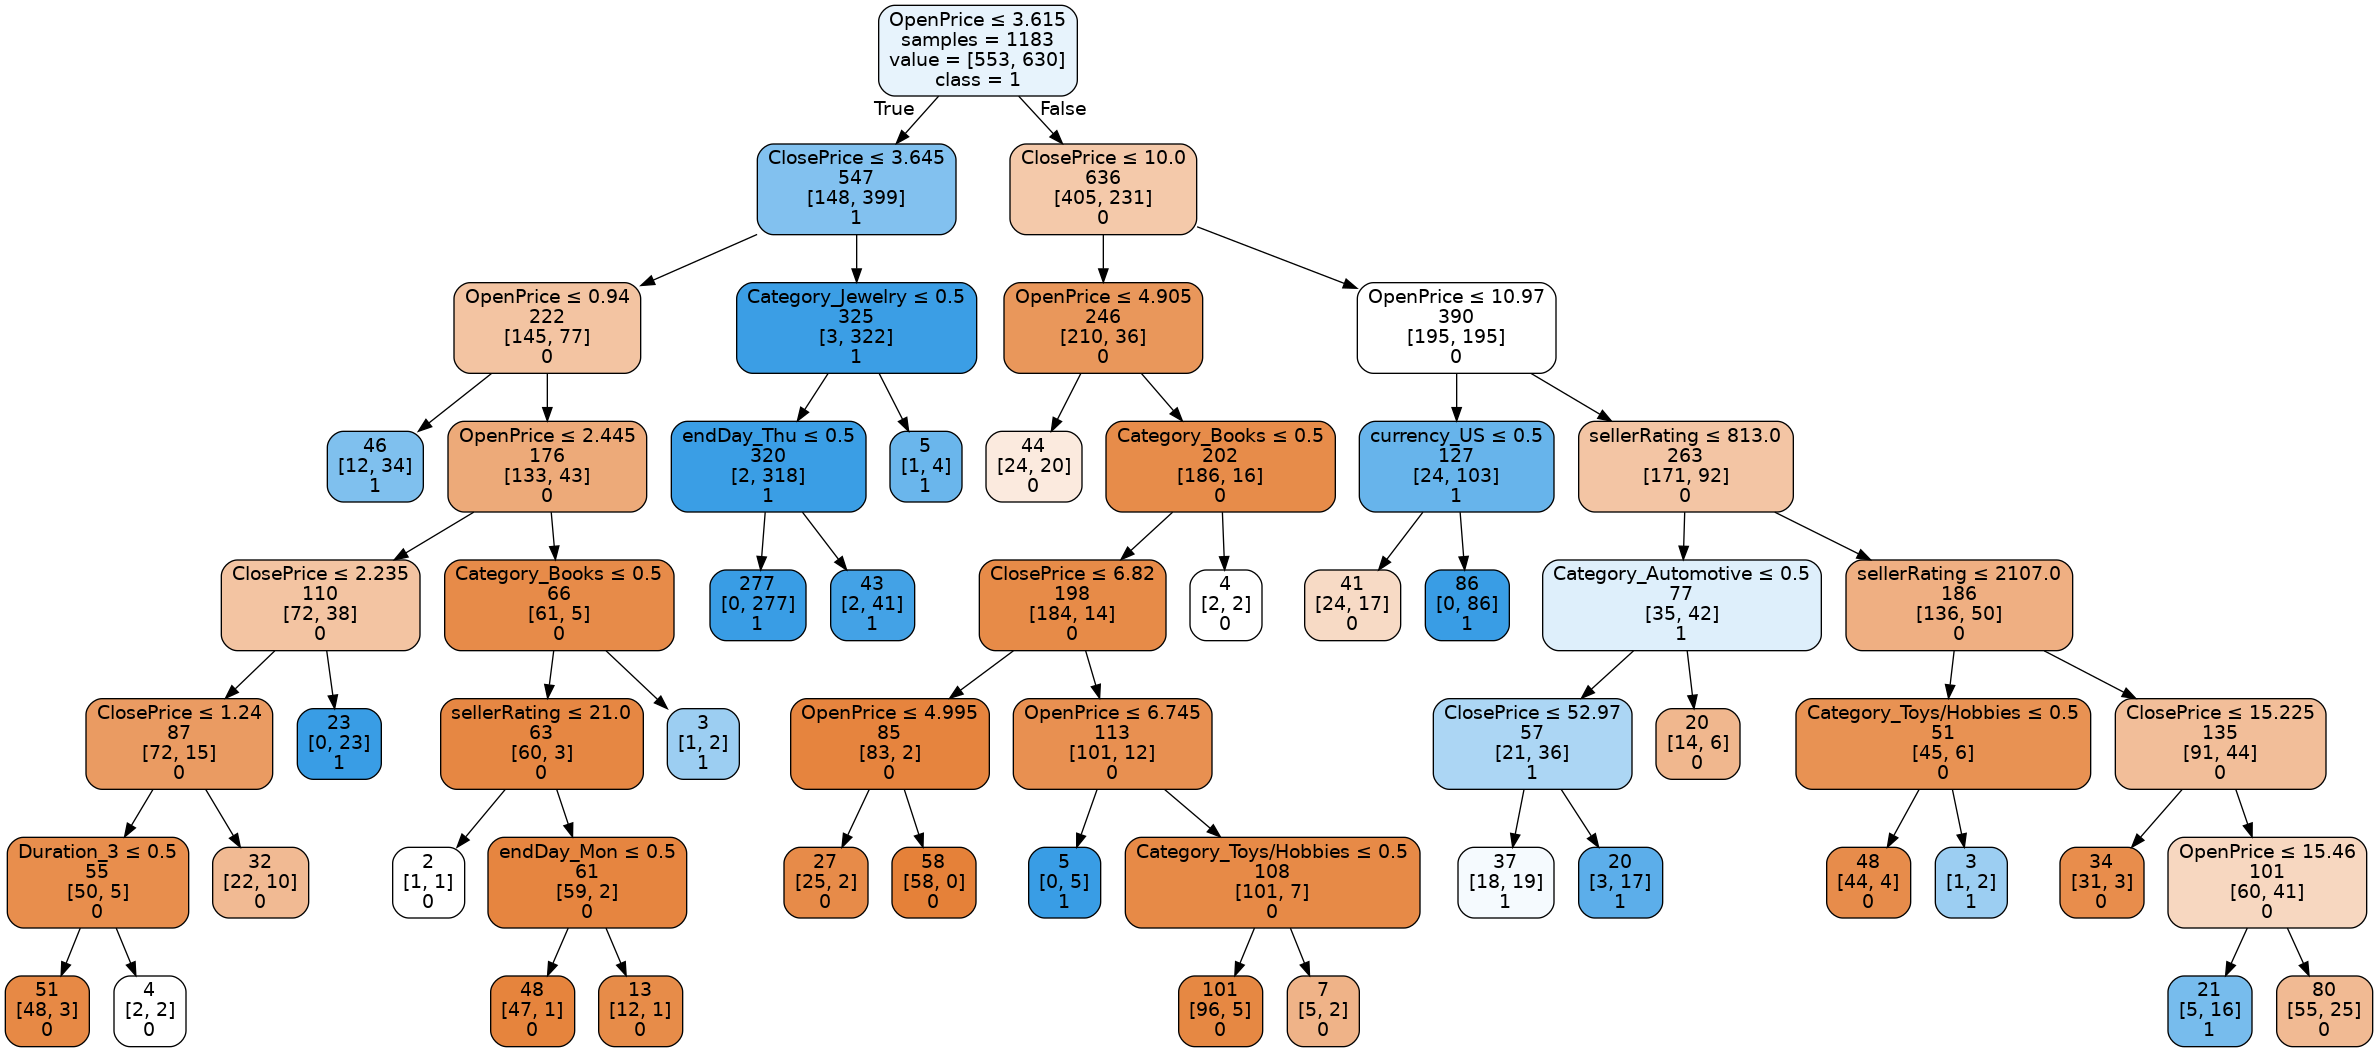

In [7]:
print("Classes: {}".format(", ".join(str(i) for i in class_tree.classes_)))

plot_decision_tree(class_tree, feature_names=train_X.columns,
                   class_names=class_tree.classes_)

The *terminal nodes* are colored orange or blue corresponding to a noncompetitive (0) or competitive (1) classification. The condition at the top of each splitting node gives the predictor and its splitting value for the split (e.g. `OpenPrice`≤ 3.615 in the top node). Besides this, a classification tree provides easily understandable classification rules (if the trees are not too large). Each terminal node is equivalent to a classification rule. The above tree gives us the following rules (from upper-left to bottom-right):

- TODO

In [8]:
classification_summary(train_y, class_tree.predict(train_X))
print()
classification_summary(valid_y, class_tree.predict(valid_X))

Confusion Matrix (Accuracy 0.8757)

       Prediction
Actual   0   1
     0 510  43
     1 104 526

Confusion Matrix (Accuracy 0.8390)

       Prediction
Actual   0   1
     0 321  32
     1  95 341


**b.** Is this model practical for predicting the outcome of a new auction?

**c.** Describe the interesting and uninteresting information that these rules provide.

**d.** Fit another classification tree (using a tree with a minimum number of records per terminal node = 50 and maximum depth = 7), this time only with predictors that can be used for predicting the outcome of a new auction. Describe the resulting tree in terms of rules. Make sure to report the smallest set of rules required for classification.

**e.** Plot the resulting tree on a scatter plot: Use the two axes for the two best (quantitative) predictors. Each auction will appear as a point, with coordinates corresponding to its values on those two predictors. Use different colors or symbols to separate competitive and noncompetitive auctions. Draw lines (you can sketch these by hand or use Python) at the values that create splits. Does this splitting seem reasonable with respect to the meaning of the two predictors? Does it seem to do a good job of separating the two classes?

**f.** Examine the lift chart and the confusion matrix for the tree. What can you say about the predictive performance of this model?

**g**. Based on this last tree, what can you conclude from these data about the chances of an auction obtaining at least two bids and its relationship to the auction settings set by the seller (duration, opening price, ending day, currency)? What would you recommend for a seller as the strategy that will most likely lead to a competitive auction?